In [6]:
!pip install --upgrade pip setuptools wheel

     |████████████████████████████████| 952 kB 14.0 MB/s            
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 45.2.0
    Uninstalling setuptools-45.2.0:
      Successfully uninstalled setuptools-45.2.0


In [7]:
!pip install --upgrade pip

In [8]:
!pip install albumentations

  Using cached albumentations-1.3.0-py3-none-any.whl (123 kB)
  Using cached opencv-python-headless-4.7.0.68.tar.gz (91.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached qudida-0.0.4-py3-none-any.whl (3.5 kB)
  Created wheel for opencv-python-headless: filename=opencv_python_headless-4.7.0.68-cp36-cp36m-linux_x86_64.whl size=29247936 sha256=8101d1539dda6ee2ea45732035d8562e6a0f4399bc9f96fe4552cd1693b08888
  Stored in directory: /home/pamessina/.cache/pip/wheels/40/32/12/7375f7b8e8290fe0e76391cc7d0b32504570ca4b1ba55b9510
Successfully built opencv-python-headless


In [10]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [80]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2, text_thickness=3):
    """Visualizes a single bounding box on the image"""    
    x_min, y_min, x_max, y_max = bbox[0], bbox[1], bbox[2], bbox[3]
    x_min *= img.shape[1]
    x_max *= img.shape[1]
    y_min *= img.shape[0]
    y_max *= img.shape[0]
    w = x_max - x_min
    h = y_max - y_min
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)    
    
    ax = 4000
    ay = 2
    bx = 256
    by = 0.25
    m = (by - ay) / (bx - ax)
    n = ay - m * ax
    font_scale = m * (img.shape[0] + img.shape[1]) * 0.5 + n
#     print('font_scale =', font_scale, (img.shape[0] + img.shape[1]) * 0.5)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
#     cv2.putText(
#         img,
#         text=class_name,
#         org=(x_min, y_min - int(0.3 * text_height)),
#         fontFace=cv2.FONT_HERSHEY_SIMPLEX,
#         fontScale=2, 
#         color=TEXT_COLOR, 
#         lineType=2,
#     )

#     ax = 4000
#     ay = 3
#     bx = 256
#     by = 0.5
#     m = (by - ay) / (bx - ax)
#     n = ay - m * ax
#     thickness = m * (img.shape[0] + img.shape[1]) * 0.5 + n

    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, TEXT_COLOR, text_thickness)
    return img


def visualize(image, bboxes, category_ids, category_id_to_name, figsize=(12, 12), thickness=2, text_thickness=3):
    img = image.copy()
    print(image.shape)
    print(img.shape)
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, thickness=thickness, text_thickness=text_thickness)
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(img)

In [12]:
image_path = '/mnt/data/mimic-cxr-jpg/images/p15/p15528228/s53078415/157febc5-ee2b7092-93d96d3d-3b125ac7-7e7795a0.jpg'

In [13]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [14]:
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import load_chest_imagenome_silver_bboxes
from medvqa.datasets.chest_imagenome import CHEST_IMAGENOME_BBOX_NAMES
import imagesize

In [15]:
bboxes_dict = load_chest_imagenome_silver_bboxes()

In [16]:
dicom_id = '157febc5-ee2b7092-93d96d3d-3b125ac7-7e7795a0'
bboxes_dict[dicom_id]

{'coords': array([0.08569182, 0.10242146, 0.4933176 , 0.77650523, 0.13404088,
        0.125     , 0.4933176 , 0.375     , 0.11792453, 0.375     ,
        0.4610849 , 0.5222513 , 0.08569182, 0.5222513 , 0.4504717 ,
        0.77650523, 0.2893082 , 0.3435864 , 0.47720125, 0.54908377,
        0.1875    , 0.10242146, 0.4933176 , 0.24541885, 0.03183962,
        0.7097513 , 0.13915095, 0.79908377, 0.35927674, 0.6158377 ,
        0.41273585, 0.72742146, 0.08569182, 0.638089  , 0.5200472 ,
        0.77650523, 0.5412736 , 0.09816754, 0.9009434 , 0.79908377,
        0.5412736 , 0.12041885, 0.884827  , 0.375     , 0.5412736 ,
        0.375     , 0.8899371 , 0.52650523, 0.5522799 , 0.52650523,
        0.9009434 , 0.79908377, 0.5412736 , 0.3435864 , 0.7130503 ,
        0.5533377 , 0.5467767 , 0.09816754, 0.8309748 , 0.24541885,
        0.8470912 , 0.7320026 , 0.9544025 , 0.8213351 , 0.5412736 ,
        0.6695026 , 0.9009434 , 0.79908377, 0.42334905, 0.03566754,
        0.5683962 , 0.4597513 , 0.4288

In [17]:
category_id_to_name = {i:name for i,name in enumerate(CHEST_IMAGENOME_BBOX_NAMES)}

In [79]:
width, height = imagesize.get(image_path)
# width, height = 224, 224
coords = bboxes_dict[dicom_id]['coords']
presence = bboxes_dict[dicom_id]['presence']
bboxes = []
bboxes_2 = []
coords = coords.reshape(-1, 4)
for i in range(len(presence)):
    if presence[i] == 1:
        x1 = coords[i][0]
        y1 = coords[i][1]
        x2 = coords[i][2]
        y2 = coords[i][3]
        bboxes.append([x1, y1, x2, y2, i])
        if i % 2 == 0:
            bboxes_2.append([x1 + (x2 - x1) * 1/3,
                           y1 + (y2 - y1) * 1/3,
                           x2 - (x2 - x1) * 1/3,
                           y2 - (y2 - y1) * 1/3, i])

In [194]:
# bboxes, category_ids

(3056, 2544, 3)
(3056, 2544, 3)


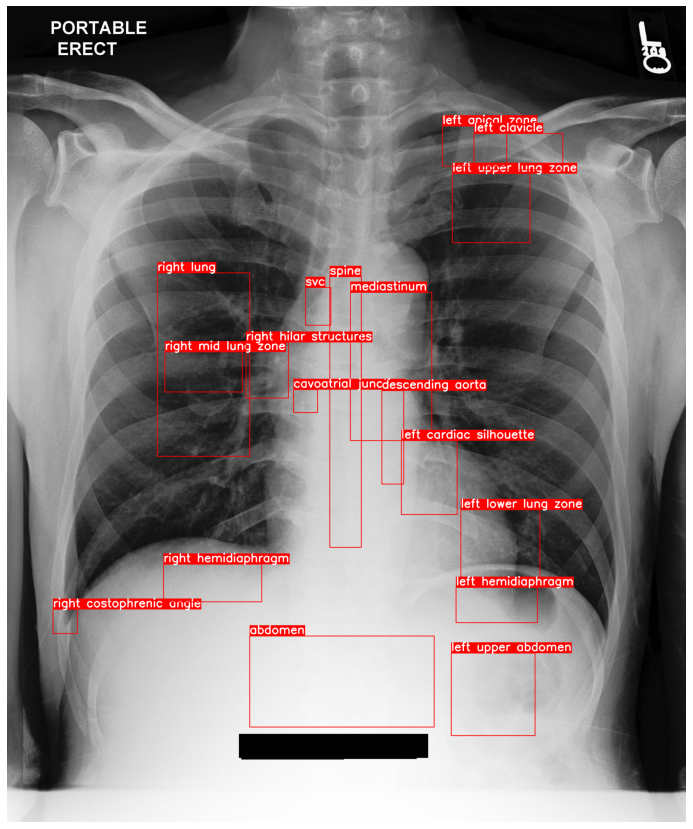

In [81]:
visualize(image, bboxes_2, category_ids_2, category_id_to_name, figsize=(15, 15))

In [160]:
# image2 = A.resize(image, 224, 224, )
image2 = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

In [162]:
image2.shape

(224, 224, 3)

In [82]:
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = A.Compose(
    [
        
#         A.RandomResizedCrop(height, width, scale=(0.1, 0.1), always_apply=True),
#         A.ShiftScaleRotate(p=1, shift_limit=0.1, rotate_limit=20, border_mode=cv2.BORDER_CONSTANT),
        A.ShiftScaleRotate(p=1, shift_limit=0, rotate_limit=0, scale_limit=(-0.5, -0.2), border_mode=cv2.BORDER_CONSTANT),
#         A.ColorJitter(brightness=(1.1,1.9), always_apply=True),
#         A.GaussNoise(always_apply=True, var_limit=(300, 400)),
#         A.RandomBrightnessContrast(always_apply=True)
    ],
    bbox_params=A.BboxParams(format='albumentations'),
    additional_targets={'bboxes2': 'bboxes'}
)

In [337]:
transformed['image'].shape

(3056, 2544, 3)

In [87]:
transformed = transform(image=image, bboxes=bboxes, bboxes2=bboxes_2)
print(len(transformed['bboxes']))
print(len(transformed['bboxes2']))
visualize(
    transformed['image'],
#     transformed['bboxes'],
    transformed['bboxes2'],
#     transformed['category_ids'],
    [x[-1] for x in transformed['bboxes2']],
    category_id_to_name,
)

TypeError: object of type 'NoneType' has no len()

In [70]:
transformed['bboxes2']

[[0.22156708935896555,
  0.327116052309672,
  0.3574423392613729,
  0.551810642083486],
 [0.23231132328510284,
  0.42408376932144165,
  0.3466981053352356,
  0.4731675386428833],
 [0.35193921128908795,
  0.41208551327387494,
  0.4145702322324117,
  0.48058464129765827],
 [0.06761006514231363,
  0.7395287950833639,
  0.10338050623734793,
  0.7693062822024027],
 [0.23047695060571036,
  0.6842277447382609,
  0.37526206175486243,
  0.7303664882977804],
 [0.6557914018630981,
  0.20527923107147217,
  0.7703092098236084,
  0.2901396155357361],
 [0.668501059214274,
  0.617364744345347,
  0.7847222288449606,
  0.7082242568333944],
 [0.6415094137191772,
  0.14725130796432495,
  0.7362421154975891,
  0.1963350772857666],
 [0.6611635287602743,
  0.7126963337262472,
  0.7810534636179606,
  0.7558900515238444],
 [0.47536687056223553,
  0.33180628220240277,
  0.5218815406163534,
  0.6636125644048054],
 [0.6878930727640787,
  0.15619546175003052,
  0.8183962305386862,
  0.20080715417861938],
 [0.50576

In [1]:
from importlib import reload
import medvqa

In [4]:
reload(medvqa.datasets.augmentation)

<module 'medvqa.datasets.augmentation' from '/home/pamessina/medvqa/medvqa/datasets/augmentation.py'>

In [3]:
from medvqa.datasets.augmentation import ImageBboxAugmentationTransforms

In [5]:
tmp = ImageBboxAugmentationTransforms((3056, 2544))

In [6]:
tfs = tmp.get_merged_spatial_color_transforms_list()

In [7]:
tfs_color = tmp.get_color_transforms_list()

In [8]:
tfs_spatial = tmp.get_spatial_transforms_list()

In [51]:
len(tfs_color)

2

In [22]:
len(tfs_spatial)

5

In [60]:
aug = tfs_color[1](image=image, bboxes=bboxes, category_ids=category_ids)
# aug = tfs_color[0](image=image, bboxes=bboxes, category_ids=category_ids)
# aug = tfs_spatial[1](image=image, bboxes=bboxes, category_ids=category_ids)

36
(3056, 2544, 3)
(3056, 2544, 3)
(3056, 2544, 3)


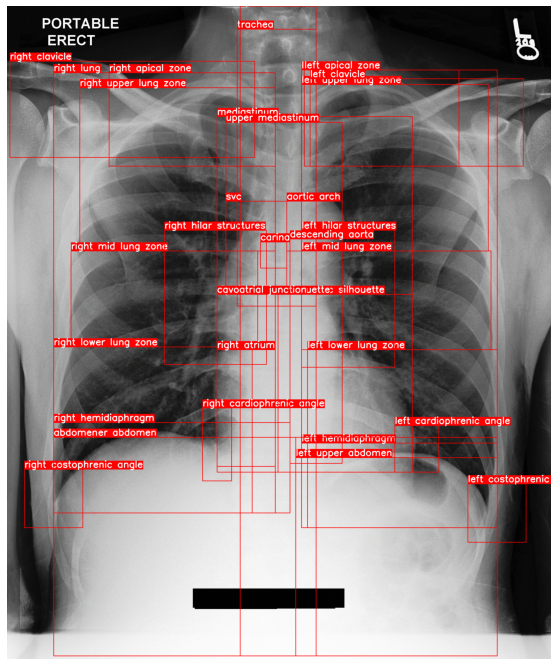

In [61]:
print(len(aug['bboxes']))
print(aug['image'].shape)
visualize(
    aug['image'],
    aug['bboxes'],
    aug['category_ids'],
    category_id_to_name,
    thickness=2,
    text_thickness=3,
)